In [22]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt, mpld3
from mpld3 import plugins
import sys, os

In [25]:
path_to_labeled = '../../bars_2018-03-26-mq.pkl'
path_to_merged = '../../2018-03-26-mq.pkl'
# path_to_labeled = '../../data/test/merge/2017-02-10.pkl'
merged_df = pd.read_pickle(path_to_merged)
merged_df.reset_index(level=0, inplace=True)
bars_df = pd.read_pickle(path_to_labeled)

In [26]:
print(merged_df.shape)
print(bars_df.shape)

(1001519, 10)
(2150, 14)


In [27]:
start_time = '2018-03-26 00:00:01.149905303-05:00'
end_time = '2018-03-26 02:00:35.578865996-05:00'

In [28]:
merged_df = merged_df[merged_df['Date-Time']>start_time]
merged_df = merged_df[merged_df['Date-Time']<end_time]
bars_df = bars_df[bars_df['Date-Time']>start_time]
bars_df = bars_df[bars_df['Date-Time']<end_time]

In [29]:
print(merged_df.shape)
print(bars_df.shape)

(27694, 10)
(35, 14)


In [50]:
def plot_barriers(i, df, merged_df, max_ind, pt_level=0.0001, sl_level=0.0001):
#     print(df.loc[i,'Bid Price']*np.array([1+pt_level,1-sl_level]), df.loc[i,'Date-Time'])
#     print(df.loc[i,'Price']*np.array([1+pt_level,1-sl_level]), df.loc[i,'Date-Time'], df.loc[merged_df.loc[i,'Date-Time']])
#     plt.hlines(df.loc[i,'Price']*np.array([1+pt_level,1-sl_level]), xmin=df.loc[i,'Date-Time'], xmax=df.loc[df.loc[i,'end_ind'],'Date-Time'], color='r', linestyles='--')
    c=['k','b','r'][df.loc[i,'label']]
#     print(df.loc[i,'label'], c)
    end_ind=min(int(df.loc[i,'end_ind']),max_ind)
    plt.hlines(df.loc[i,'Bid Price']*np.array([1+pt_level,1-sl_level]), xmin=df.loc[i,'Date-Time'], xmax=merged_df.loc[end_ind,'Date-Time'], color=c, linestyles='--')
    plt.vlines(x = [df.loc[i,'Date-Time'], merged_df.loc[end_ind,'Date-Time']], ymin=df.loc[i,'Bid Price']*(1-sl_level), ymax=df.loc[i,'Bid Price']*(1+pt_level), color=c, linestyles='--')
# plot_barriers(i, bars_df)

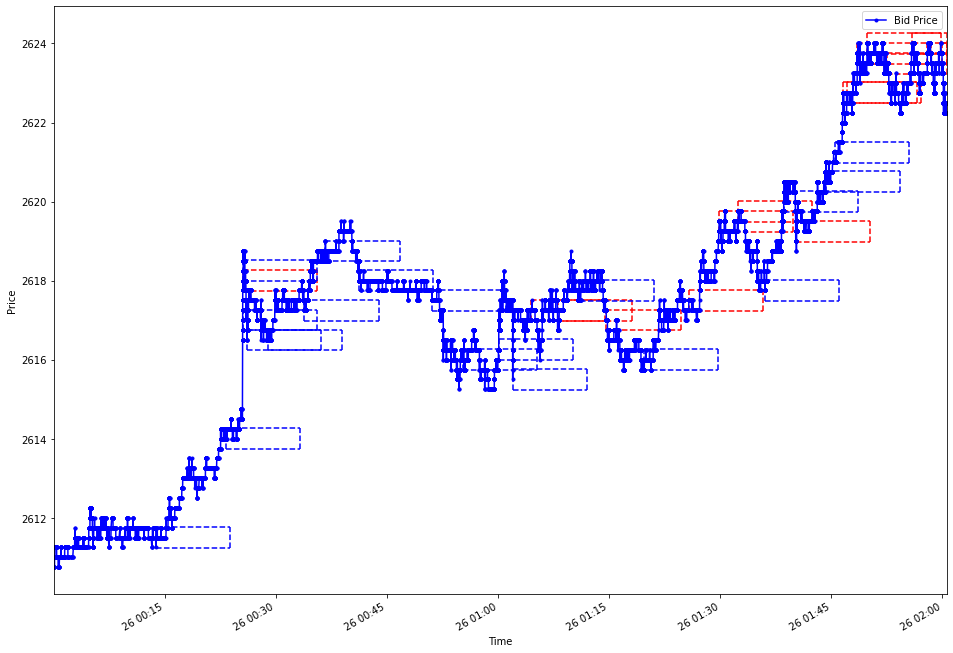

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))

merged_df.plot(x='Date-Time', y='Bid Price', style='.-', color='b', figsize=(16,12),ax=ax)
# merged_df.plot(x='Date-Time', y='Ask Price', style='.-', color='r', figsize=(16,12), ax=ax)
# merged_df.plot(y='Price', style='.', figsize=(16,12))
plt.xlabel("Time")
plt.ylabel("Price")
max_ind = merged_df.index.max()
for i in range(0,len(bars_df)):
#     print(i)
    plot_barriers(i, bars_df, merged_df,max_ind , pt_level=0.0001, sl_level=0.0001)
plt.show();

In [41]:
bars_df.index.max()

34

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))


ax.plot(merged_df['Date-Time'], merged_df['Bid Price'], "-ro", markersize=2)
ax.plot(merged_df['Date-Time'], merged_df['Ask Price'], "-bo", markersize=2)
max_ind = merged_df.index.max()
for i in range(0,len(bars_df)):
#     print(i)
    plot_barriers(i, bars_df, merged_df,max_ind , pt_level=0.0001, sl_level=0.0001)
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()